In [1]:
import os
import json
from pathlib import Path

import torch

import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv
import numpy as np
from dotenv import load_dotenv
from scipy.ndimage import rotate
from yolov5.models.common import Detections

from utils.shortcut import get_fake_result
from utils.yolo import get_teeth_ROI

load_dotenv()
matplotlib.use('module://matplotlib_inline.backend_inline')

%matplotlib inline



/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/torchvision/io/image.py:11: UserWarning: Failed to load image Python extension: 
  warn(f"Failed to load image Python extension: {e}")


In [2]:
model_path = Path(os.getenv('YOLO_MODEL_DIR')) / '8-bound.pt'
model = torch.hub.load(r'..\YOLO', 'custom', path=model_path, source='local') if model_path.is_file() else None
data_dir = Path(os.getenv('DATASET_DIR')) / 'phase-2'
data_dir


PosixPath('/Users/lucyxu/PycharmProjects/datasets/phase-2')

In [3]:
image_paths = list(data_dir.glob('00008026.jpg'))
image_path = image_paths[0]
image_name = image_path

image_path.name


'00008026.jpg'

/opt/miniconda3/envs/pt113/lib/python3.9/site-packages/yolov5/utils/plots.py:475: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xyxy = torch.tensor(xyxy).view(-1, 4)


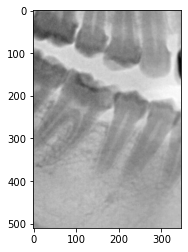

In [4]:
roi_index = 3
tooth_position_dict = {
    0: 'left',
    1: 'middle',
    2: 'right'

}
filename = image_name.stem

if model:
    results = model(image_name)
else:
    results = get_fake_result(image_name)

teeth_roi = get_teeth_ROI(results)
teeth_roi_images = teeth_roi['images'][filename]
teeth_roi_split_teeth = teeth_roi['split_teeth']

target_roi = teeth_roi_images[roi_index]
target_roi_image = target_roi['image']
flag = target_roi['flag']
tooth_position = target_roi['tooth_position']
im_g = cv.cvtColor(target_roi_image, cv.COLOR_RGBA2GRAY)
im_g_shape = np.array(np.array(im_g.shape)[[1, 0]])

plt.gray()
plt.imshow(1 - im_g)
plt.show()


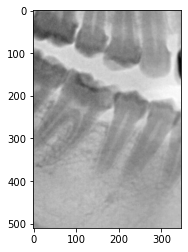

In [5]:
plt.gray()
plt.imshow(1 - im_g)
plt.show()
